![](https://images.pexels.com/photos/786801/pexels-photo-786801.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260)

# Face Recognition

Kevin J. Walchko, Phd

---

**Still in development:** Althought OpenCV has a lot of capability, the documentation is poor on newer functions/classes.

I sort of have this working, but it is far from perfect. Infact, the more I play with it, the worse it seems to get.

## References

- [OpenCV 3.4.3 Face Recognition](https://docs.opencv.org/3.4/da/d60/tutorial_face_main.html)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

In [3]:
from collections import namedtuple
Face = namedtuple('Face', 'x y w h')

In [4]:
def getFace(img, window):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    found = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
    face = Face(*found[0])

    x,y,w,h = face
    img = img[y:y+h, x:x+w]
    img = cv2.resize(img, window)
    
    return img

In [5]:
def getTrainingImages(path):
    files = glob.glob('{}/*.jpg'.format(path))
    data = []
    for fname in files:
        im = cv2.imread(fname)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        # im = cv2.equalizeHist(im)
        data.append(im)
    return data

In [6]:
def formatData(imgs, label, window):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    data = []
    labels = []
    for im in imgs:
        found = face_cascade.detectMultiScale(im, scaleFactor=1.2, minNeighbors=5)
        if len(found) == 1:
            x,y,w,h = found[0]
            i = im[y:y+h, x:x+w]
            i = cv2.resize(i, window)
            data.append(i)
            labels.append(label)
        else:
            print('crap, found too many faces: {}'.format(len(found)))
    print('Haar found {} faces in training data'.format(len(labels)))
    return data, labels

In [7]:
def whois(fname, face_recognizer, window):
    names = [
        "Kristen Bell",
        "Karen Gillan"
    ]
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = getFace(img, window)
    plt.figure()
    plt.imshow(img, cmap='gray');
    
    collector = cv2.face.StandardCollector_create()
    face_recognizer.predict_collect(img, collector)
    dist = collector.getMinDist()
    nbr_predicted = collector.getMinLabel()
    print(">>>", names[nbr_predicted], " (dist="+str(int(dist))+")")

# Kristen Bell

In [8]:
data = getTrainingImages('kristen_bell')

Haar found 12 faces in training data


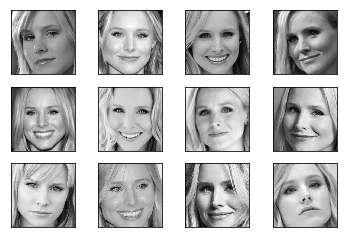

In [9]:
window = (300,300)
kb_train_data, kb_labels = formatData(data, 0, window)

num_imgs = len(kb_train_data)
for i, (f, l) in enumerate(zip(kb_train_data,kb_labels)):
    plt.subplot(num_imgs//4, 4, i+1)
    plt.imshow(f, cmap='gray')
    plt.xticks([])
    plt.yticks([])

# Karen Gillian

13
crap, found too many faces: 2
Haar found 12 faces in training data


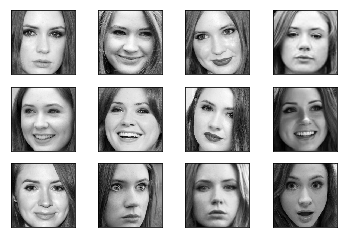

In [21]:
data = getTrainingImages('karen_gillan')
print(len(data))

window = (300,300)
kg_train_data, kg_labels = formatData(data, 1, window)

num_imgs = len(kg_train_data)
for i, (f, l) in enumerate(zip(kg_train_data, kg_labels)):
    plt.subplot(num_imgs//4, 4, i+1)
    plt.imshow(f, cmap='gray')
    plt.xticks([])
    plt.yticks([])

# multi

In [22]:
face_recognizer = cv2.face.FisherFaceRecognizer_create()
# face_recognizer = cv2.face.EigenFaceRecognizer_create()
# face_recognizer = cv2.face.LBPHFaceRecognizer_create()

face_recognizer.train(kb_train_data + kg_train_data, np.array(kb_labels + kg_labels))

>>> Karen Gillan  (dist=1419)


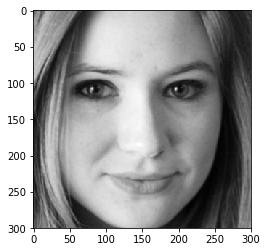

In [23]:
whois('unknown/karen-gillan-3.jpg',face_recognizer, window)

>>> Kristen Bell  (dist=1126)


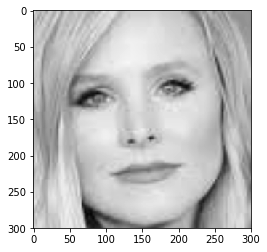

In [24]:
whois('unknown/kristen-bell-0.jpg',face_recognizer, window)

>>> Karen Gillan  (dist=14)


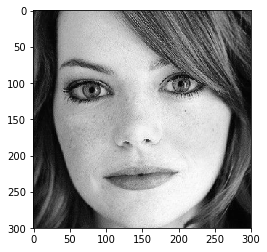

In [25]:
whois('unknown/emma-stone-0.jpg',face_recognizer, window)

>>> Karen Gillan  (dist=2706)


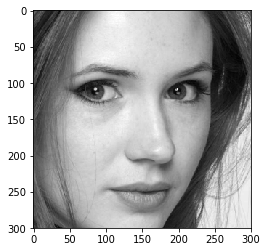

In [15]:
whois('unknown/karen-gillan-0.jpg',face_recognizer, window)

>>> Kristen Bell  (dist=2664)
>>> Kristen Bell  (dist=2590)


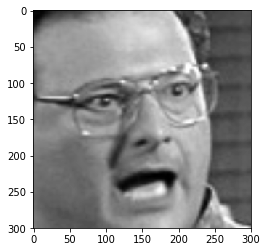

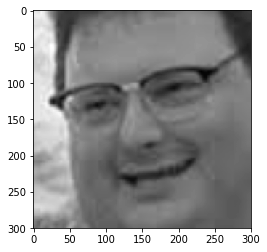

In [16]:
whois('unknown/wayne-knight-0.jpg',face_recognizer, window)
whois('unknown/wayne-knight-1.jpg',face_recognizer, window)

>>> Kristen Bell  (dist=1710)
>>> Kristen Bell  (dist=1975)


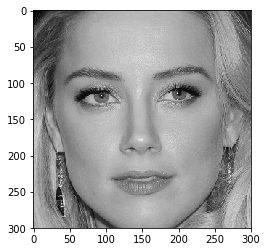

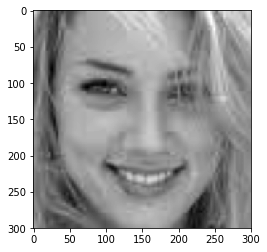

In [17]:
whois('unknown/amber-heard-0.jpg',face_recognizer, window)
whois('unknown/amber-heard-1.jpg',face_recognizer, window)

>>> Karen Gillan  (dist=0)


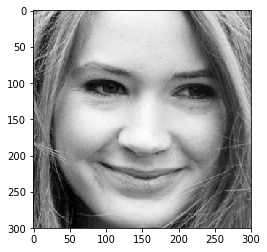

In [18]:
# this is training data, it should be right on
whois('karen_gillan/1.jpg',face_recognizer, window)

>>> Karen Gillan  (dist=1209)
>>> Karen Gillan  (dist=2888)


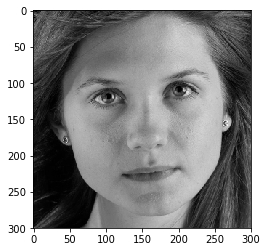

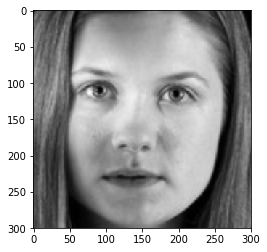

In [19]:
whois('unknown/bonnie-wright-0.jpg',face_recognizer, window)
whois('unknown/bonnie-wright-1.jpg',face_recognizer, window)

>>> Kristen Bell  (dist=188)
>>> Kristen Bell  (dist=632)
>>> Kristen Bell  (dist=1537)
>>> Kristen Bell  (dist=3437)


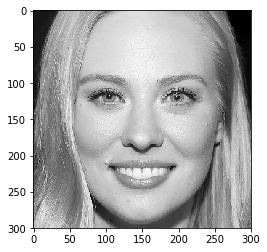

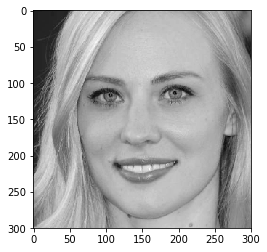

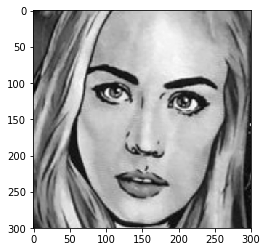

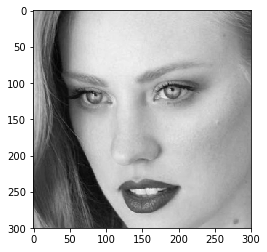

In [20]:
whois('unknown/deborah-ann-woll-0.jpg',face_recognizer, window)
whois('unknown/deborah-ann-woll-1.jpg',face_recognizer, window)
whois('unknown/deborah-ann-woll-2.jpg',face_recognizer, window)
whois('unknown/deborah-ann-woll-3.jpg',face_recognizer, window)